# Exercício PA3-4

Exercício com data de entrega para 30 de novembro de 2020.


Aluno: Noé de Lima Bezerra

<noe_lima@id.uff.br>

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Math, Image, IFrame
#from sympy.abc import x, y, z
sp.init_printing(use_latex='mathjax',latex_mode='equation*')

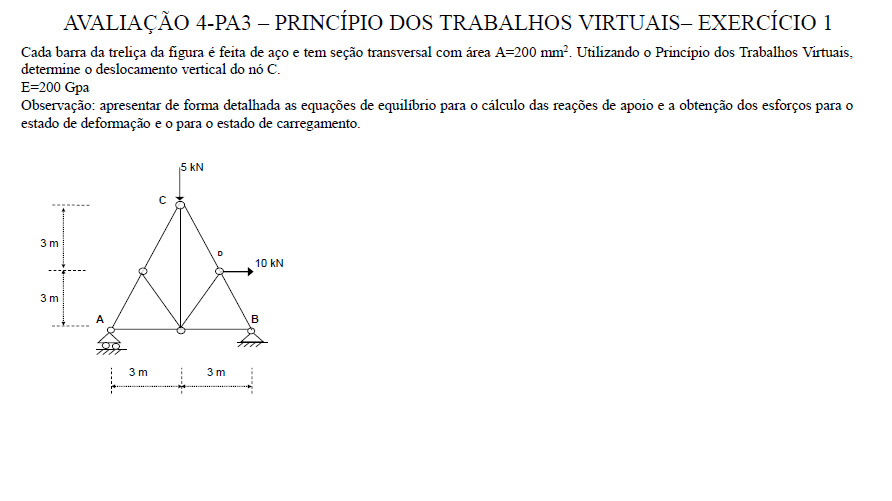

In [2]:
Image("Figuras/PA3-4.png")

# Solução

Para encontrar o deslocamento em $C$, devemos calcular as reações de apoio e os esforços nas barras para o estado de deformação e, em seguida, para o estado de carregamento.

Para tanto, vamos utilizar as equações de equilíbrio.

\begin{equation*}
    \sum_{F_{x}} = 0
\end{equation*}

\begin{equation*}
    \sum_{F_{y}} = 0
\end{equation*}

\begin{equation*}
    \sum_{M_{z}} = 0
\end{equation*}

Dados:

* $A = 200~mm^{2}$

* $E = 200~GPa$

In [3]:
m,kN = sp.symbols("m,kN",positive=True)
Pa = kN/(1000*m**2)
A = 200*(m/1000)**2
E = 200*Pa*10**9

In [4]:
def abs(v):
    return np.linalg.norm(v)

## Estado de Deformação

### Reações de Apoio

* $V_{A} = -2,5~kN$

* $V_{B} = 7,2~kN$

* $H_{B} = -10~kN$

In [5]:
F_A_D = sp.Array([0,-2.5])*kN
F_B_D = sp.Array([-10,7.5])*kN
display(F_A_D,F_B_D)

[0  -2.5⋅kN]

[-10⋅kN  7.5⋅kN]

### Esforços nas Barras

Para calcular os esforços, foi adotada a seguinte numeração das barras:

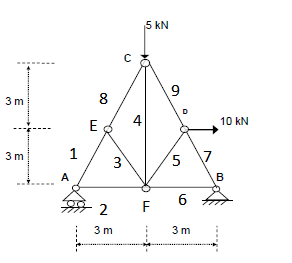

In [6]:
Image("Figuras/PA3-4-1.png")

In [7]:
barra_1 = np.array([1.5,3])
barra_2 = np.array([3,0])
barra_3 = np.array([1.5,-3])
barra_4 = np.array([0,6])
barra_5 = np.array([1.5,3])
barra_6 = np.array([0,3])
barra_7 = np.array([1.5,-3])
barra_8 = np.array([1.5,3])
barra_9 = np.array([1.5,-3])
L = np.array([abs(barra_1),abs(barra_2),abs(barra_3),abs(barra_4),abs(barra_5),abs(barra_6),abs(barra_7),abs(barra_8),abs(barra_9)])*m

In [8]:
P_1 = np.array([0,-5*kN])
P_2 = np.array([10*kN,0])
F_1_D = -F_A_D[1]*abs(barra_1)/barra_1[1]
F_2_D = -F_1_D*barra_1[0]/abs(barra_1)
F_7_D = F_B_D[1]*abs(barra_7)/barra_7[1]
F_6_D = -(F_7_D*barra_7[0]/abs(barra_7)-F_B_D[0])
F_3_D = 0
F_8_D = F_1_D
F_5_D = np.cross(P_2,barra_7/abs(barra_7))/(np.cross(barra_5/abs(barra_5),barra_7/abs(barra_7)))
F_9_D = F_7_D + np.dot((P_2-F_5_D*barra_5/abs(barra_5)),barra_9/abs(barra_9))
temp = (F_8_D*barra_8/abs(barra_8) - F_9_D*barra_9/abs(barra_9))
F_4_D = (P_1[1] - np.dot(temp,barra_4/abs(barra_4)))
deform = np.array([F_1_D,F_2_D,F_3_D,F_4_D,F_5_D,F_6_D,F_7_D,F_8_D,F_9_D])
display(deform)

array([2.79508497187474*kN, -1.25*kN, 0, -10.0*kN, 11.1803398874989*kN,
       -6.25*kN, -8.38525491562421*kN, 2.79508497187474*kN,
       2.79508497187474*kN], dtype=object)

## Estado de Carregamento

### Reações de Apoio

Para o estado de carregamento, inserimos uma força virtual em $C$ orientada para baixo, no valor de $1$. Assim, temos as seguintes reações de apoio:

* $V_{A} = 0,5$

* $V_{B} = 0,5$

* $H_{B} = 0$

In [9]:
F_A_C = sp.Array([0,0.5])
F_B_C = sp.Array([0,0.5])
display(F_A_C,F_B_C)

[0  0.5]

[0  0.5]

### Esforços nas Barras

In [10]:
P_1 = np.array([0,-1])
P_2 = np.array([0,0])
F_1_C = -F_A_C[1]*abs(barra_1)/barra_1[1]
F_2_C = -F_1_C*barra_1[0]/abs(barra_1)
F_7_C = F_B_C[1]*abs(barra_7)/barra_7[1]
F_6_C = -(F_7_C*barra_7[0]/abs(barra_7)-F_B_C[0])
F_3_C = 0
F_8_C = F_1_C
F_5_C = np.cross(P_2,barra_7/abs(barra_7))/(np.cross(barra_5/abs(barra_5),barra_7/abs(barra_7)))
F_9_C = F_7_C + np.dot((P_2-F_5_C*barra_5/abs(barra_5)),barra_9/abs(barra_9))
temp = (F_8_C*barra_8/abs(barra_8) - F_9_C*barra_9/abs(barra_9))
F_4_C = (P_1 - np.dot(temp,barra_4/abs(barra_4)))[1]
carreg = np.array([F_1_C,F_2_C,F_3_C,F_4_C,F_5_C,F_6_C,F_7_C,F_8_C,F_9_C])
display(carreg)

array([-0.559016994374947, 0.250000000000000, 0, 0, 0.0,
       0.250000000000000, -0.559016994374947, -0.559016994374947,
       -0.559016994374947], dtype=object)

## Deslocamento em $C$

In [11]:
delta = np.dot(carreg*deform,L)/(E*A)
print(delta)

-0.000140625*m


$$\delta = 0,140625~mm(\uparrow)$$